In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/SatImageClassification/data/"
batch_size = 32
height = 72
width = 128

Mounted at /content/drive


In [9]:
#Loading the dataset and splitting into training and validation sets
train = tf.keras.utils.image_dataset_from_directory(
path,
validation_split=0.2,
subset= "training",
seed=1234,
image_size=(height, width),
batch_size=batch_size)
val = tf.keras.utils.image_dataset_from_directory(
path,
validation_split=0.2,
subset= "validation",
seed=1234,
image_size = (height,width),
batch_size=batch_size)

Found 400 files belonging to 4 classes.
Using 320 files for training.
Found 400 files belonging to 4 classes.
Using 80 files for validation.


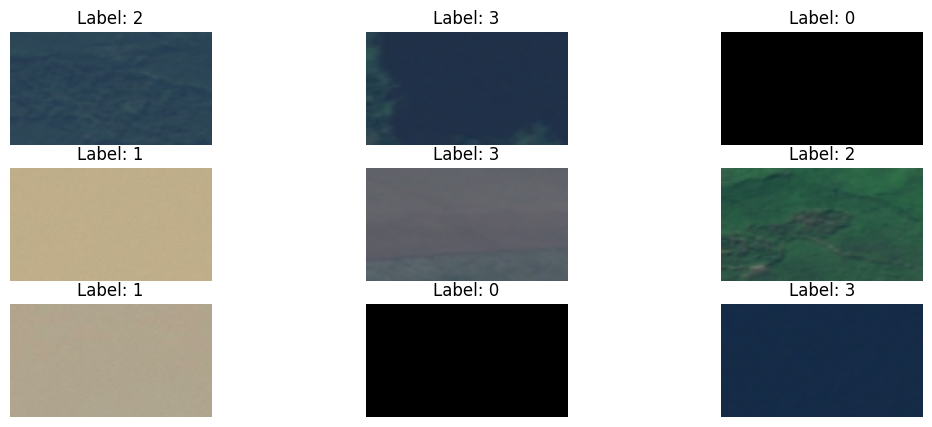

In [10]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

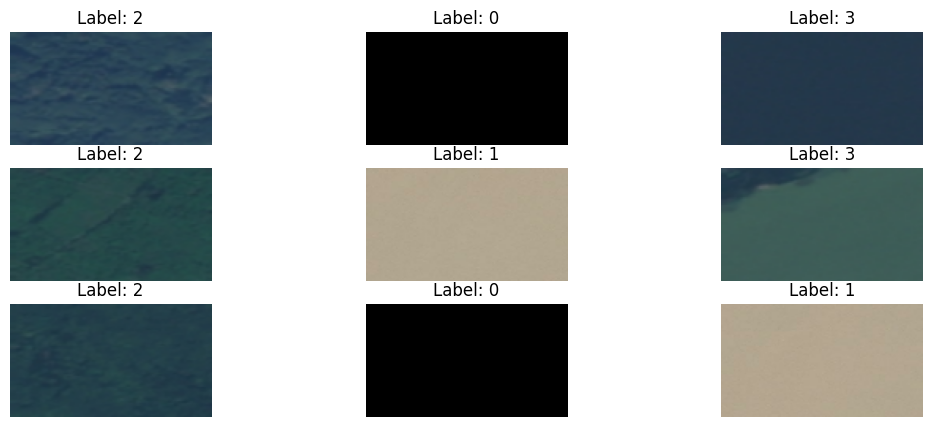

In [11]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [12]:
# print all the areas as classes in the dataset
classCount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {classCount} different Classes")

There are 4 different Classes


In [25]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [14]:
from time import asctime
# CNN model architecture
model = Sequential([
    layers.Input(shape=(height,width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(classCount)
])

# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)

In [17]:
# Compiling the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])


In [18]:
# set epochs and fit the model
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 766ms/step - accuracy: 0.3494 - loss: 1.1798 - val_accuracy: 0.7375 - val_loss: 0.6618
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.7833 - loss: 0.5142 - val_accuracy: 0.7250 - val_loss: 0.3442
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8040 - loss: 0.3474 - val_accuracy: 0.7375 - val_loss: 0.3338
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7760 - loss: 0.3354 - val_accuracy: 0.8000 - val_loss: 0.4528
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.7806 - loss: 0.3440 - val_accuracy: 0.9250 - val_loss: 0.2913
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.8250 - loss: 0.2690 - val_accuracy: 0.9375 - val_loss: 0.2488
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9437 - loss: 0.1952 - val_accuracy: 0.9250 - val_loss: 0.2296
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9106 - loss: 0.2213 - val_accuracy: 0.

In [21]:
# print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 72, 128, 3)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 72, 128, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

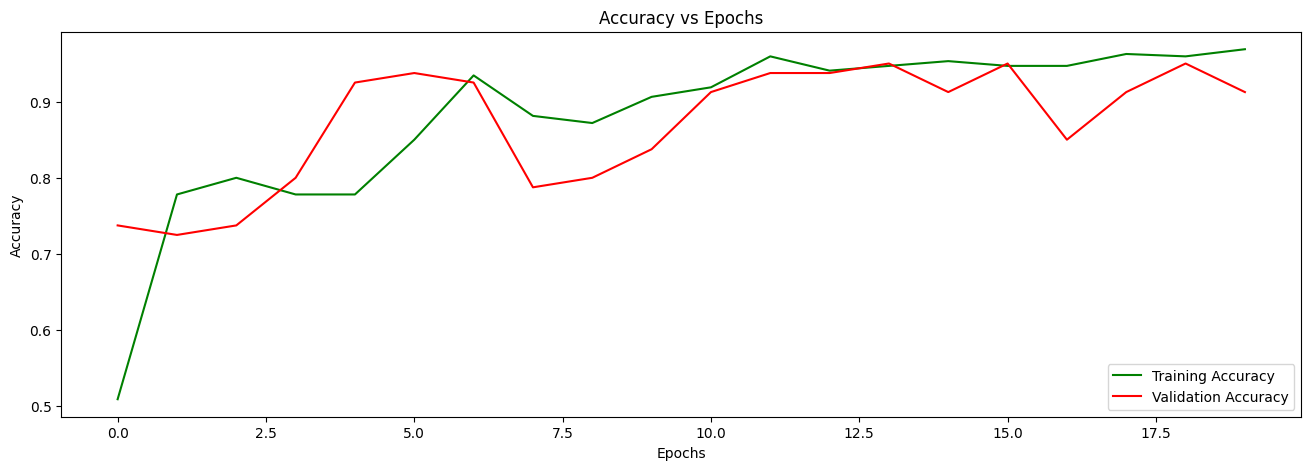

In [22]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy =history.history['val_accuracy']
loss =  history.history['loss']
val_loss=  history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

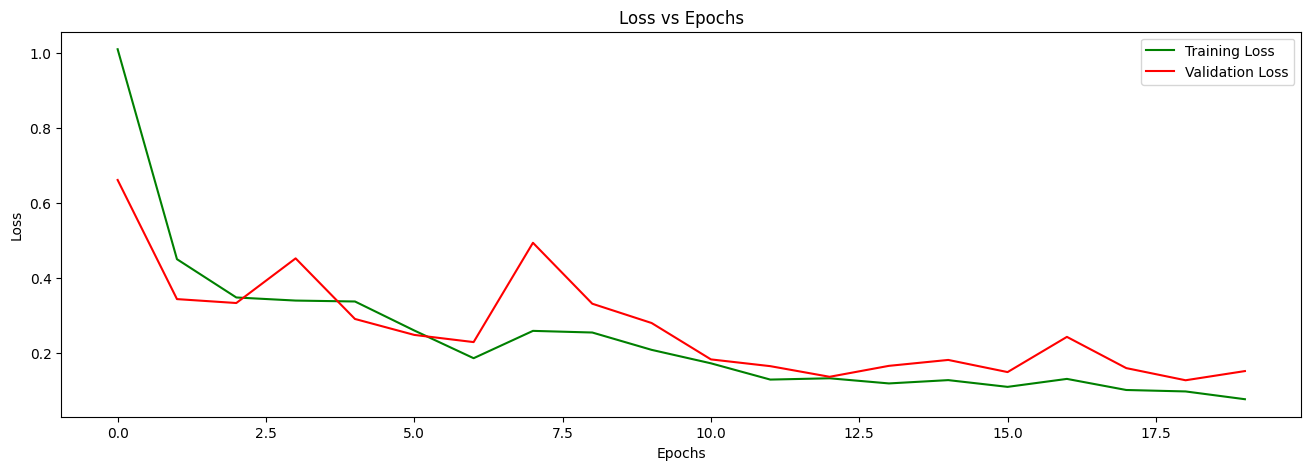

In [23]:
# Loss vs Epochs
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


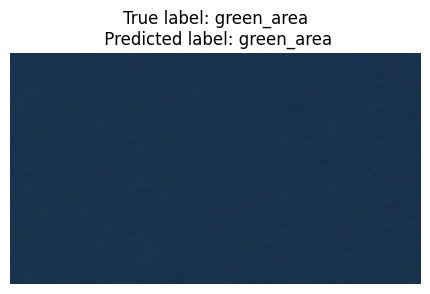

In [26]:
# Predicting one image from the validation dataset
plt.figure(figsize=(6, 3))

for images, labels in val.take(1):
  sample_image = images[1]
  true_label= labels [1]
  sample_image = tf.expand_dims(sample_image, axis=0)
  predictions = model.predict(sample_image)
  predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
  predicted_class =classes[predicted_class_index]
  plt.imshow(sample_image[0].numpy().astype("uint8"))
  plt.title(f"True label: {classes[true_label.numpy()]}\n Predicted label: {predicted_class}")
  plt.axis('off')
plt.show()